# Titanic Dataset

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve
from sklearn import metrics

## A) Dataset Information

In [61]:
df = pd.read_csv('titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
df.drop(['PassengerId'], axis=1, inplace=True)

In [63]:
feature = list(df['Name'])
arr = []
for i in range(len(df['Name'])):
    newFeature = feature[i].split(', ')
    newFeature = newFeature[1].split('.')
    newFeature = newFeature[0]
    arr.append(newFeature)
df['Name'] = arr

In [64]:
df['Name'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Name, dtype: int64

In [65]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [66]:
df['Age'].fillna(int(df['Age'].mean()),inplace=True)
df['Cabin'].fillna('Not_Provided',inplace=True)
df['Embarked'].fillna('Not_Provided',inplace=True)
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [67]:
df.duplicated().sum()

13

In [68]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  878 non-null    int64  
 1   Pclass    878 non-null    int64  
 2   Name      878 non-null    object 
 3   Sex       878 non-null    object 
 4   Age       878 non-null    float64
 5   SibSp     878 non-null    int64  
 6   Parch     878 non-null    int64  
 7   Ticket    878 non-null    object 
 8   Fare      878 non-null    float64
 9   Cabin     878 non-null    object 
 10  Embarked  878 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 82.3+ KB


In [70]:
df.shape

(878, 11)

## Comments
*The dataset consisits of 11 columns and 878 rows.

*There are 177 NaN objects in Age, 687 Nan Objects in Cabin, 2 in Embarked 

Replaced by mean in case of numerical features or 'Not Provided in case of non-numerical features.

*There are 13 duplcated items. (Dropped)

*Numerical Columns:

Survived - Pclass - Age - SibSp - Parch - Fare 

*No Non-Numerical columns:

Name - Sex - Ticket - Cabin - Embarked

## ----------------------------------------------------------------------------------------------------------------------------------------------------------------

## B) Data Visualization

[Text(0.5, 1.0, 'Outliers: Siblings')]

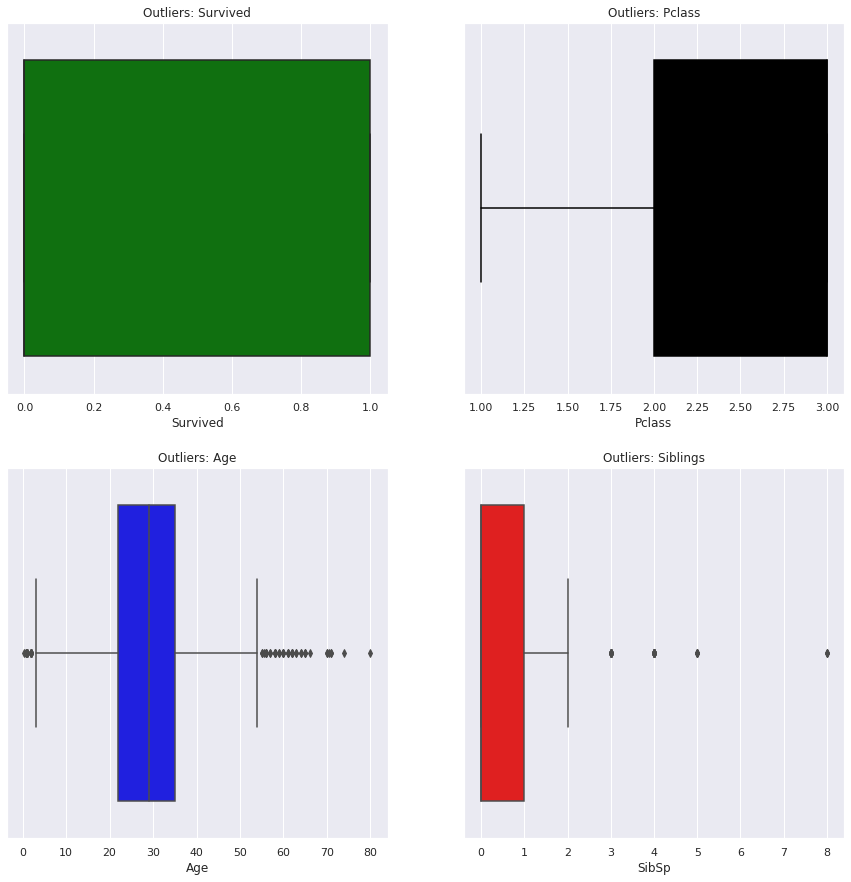

In [71]:
# detecting the outliers
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(15,15)

sns.boxplot(x='Survived', data=df, color='green',ax=axes[0,0]).set(title='Outliers: Survived')
sns.boxplot(x='Pclass', data=df, color='black',ax=axes[0,1]).set(title='Outliers: Pclass')
sns.boxplot(x='Age', data=df, color='blue',ax=axes[1,0]).set(title='Outliers: Age')
sns.boxplot(x='SibSp', data=df, color='red',ax=axes[1,1]).set(title='Outliers: Siblings')

#Some Outliers detected in Age , Siblings

[Text(0.5, 1.0, 'Outliers: Fare')]

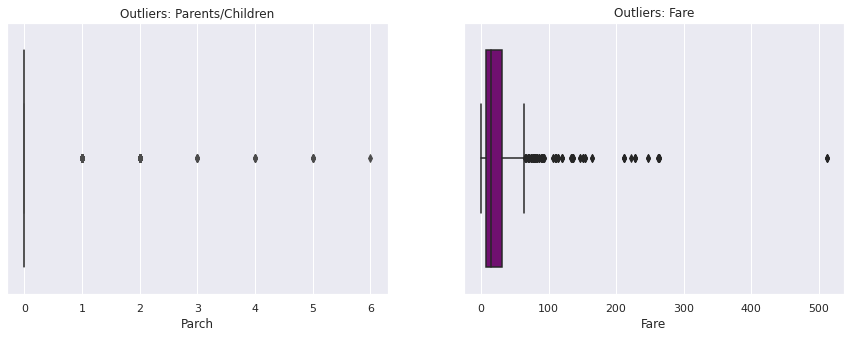

In [72]:
# detecting the outliers
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15,5)

sns.boxplot(x='Parch', data=df, color='yellow',ax=axes[0]).set(title='Outliers: Parents/Children')
sns.boxplot(x='Fare', data=df, color='purple',ax=axes[1]).set(title='Outliers: Fare')

#Some Outliers detected in both features

In [73]:
# Old-Aged Passengers
df[df['Age']>70]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,0,1,Mr,male,71.0,0,0,PC 17754,34.6542,A5,C
116,0,3,Mr,male,70.5,0,0,370369,7.7500,Not_Provided,Q
493,0,1,Mr,male,71.0,0,0,PC 17609,49.5042,Not_Provided,C
630,1,1,Mr,male,80.0,0,0,27042,30.0000,A23,S
851,0,3,Mr,male,74.0,0,0,347060,7.7750,Not_Provided,S


In [74]:
#Highest Fare Paid
df[df['Fare']>500]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,1,1,Miss,female,35.0,0,0,PC 17755,512.3292,Not_Provided,C
679,1,1,Mr,male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,1,1,Mr,male,35.0,0,0,PC 17755,512.3292,B101,C


In [75]:
# Passengers with many siblings
df[df['SibSp']>=8]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,0,3,Master,male,29.0,8,2,CA. 2343,69.55,Not_Provided,S
180,0,3,Miss,female,29.0,8,2,CA. 2343,69.55,Not_Provided,S
201,0,3,Mr,male,29.0,8,2,CA. 2343,69.55,Not_Provided,S


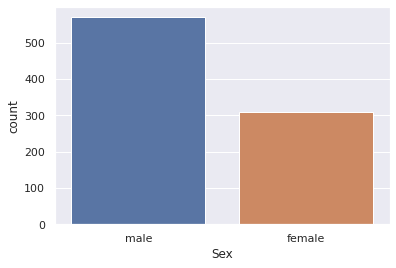

In [76]:
# Differentiating between customers according to gender
sns.countplot(x='Sex',data=df)

# Higher male rates

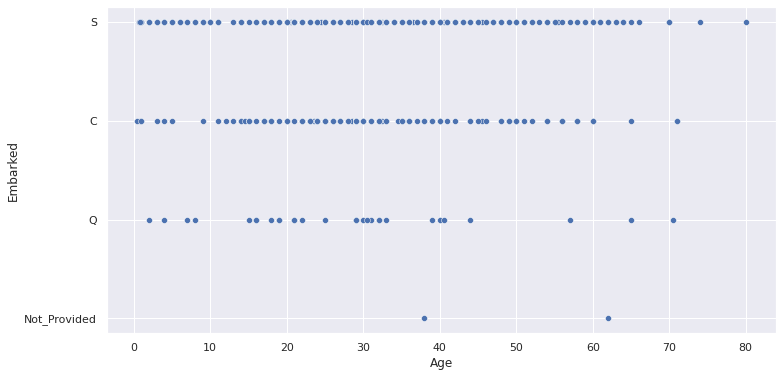

In [77]:
# Paid fare relation with age and gender
sns.set(rc={'figure.figsize':(12,6)})
sns.scatterplot(x='Age',y='Embarked',data=df)

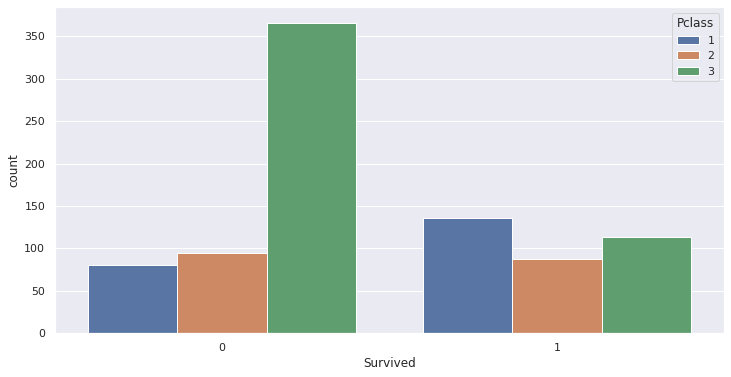

In [78]:
# Less Survive rate at Class 3
sns.countplot(data=df,x='Survived',hue='Pclass')

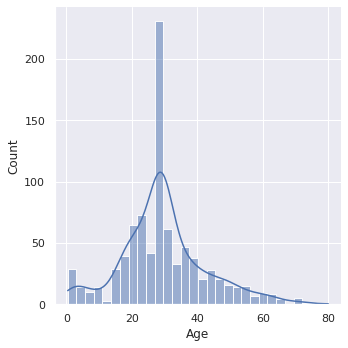

In [79]:
#Most Customers are around 30
sns.displot(df.Age,kde=True)

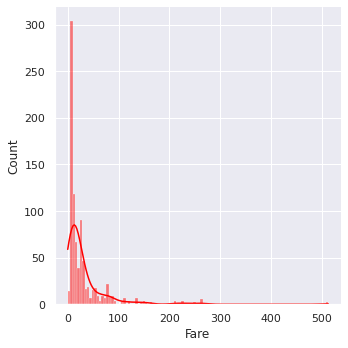

In [80]:
#The most paid fare is between 0 and 100
sns.displot(df.Fare,kde=True,color='red')

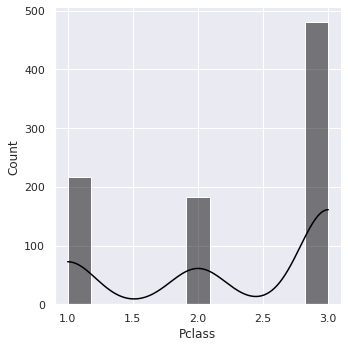

In [81]:
# Most Customers are Class 3
sns.displot(df.Pclass,kde=True,color='black')

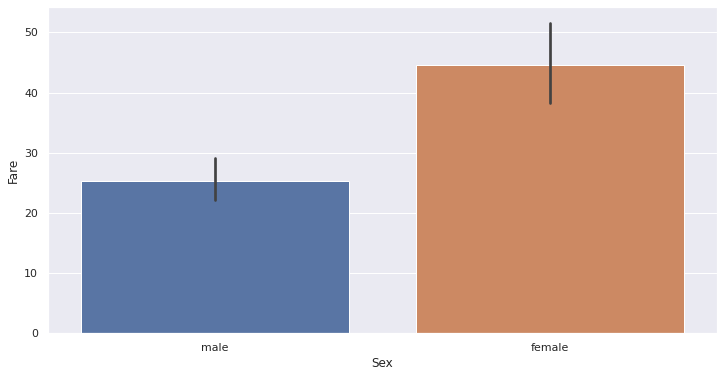

In [82]:
# Female have higher paid rates 
sns.barplot(data = df, y='Fare',x='Sex')

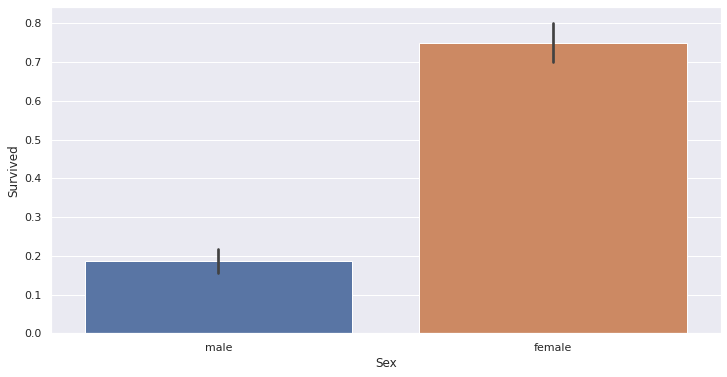

In [83]:
# Female have higher survival rates 
sns.barplot(data = df, y='Survived',x='Sex')

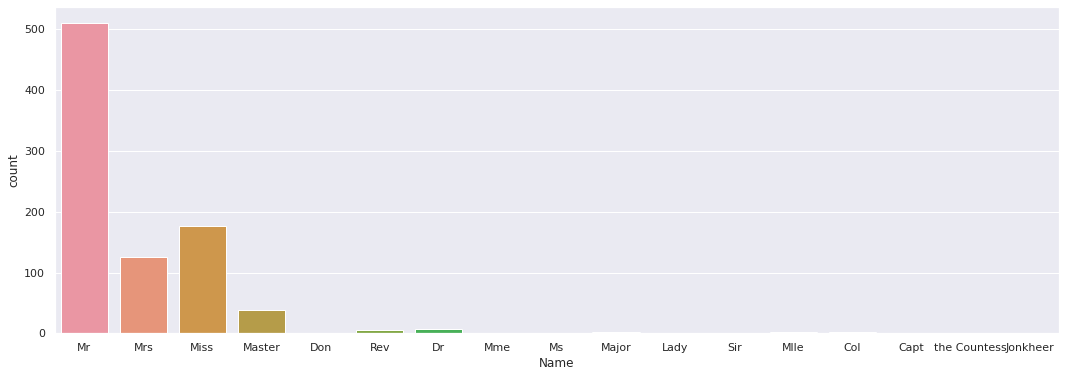

In [84]:
# Differntiating between passengers according to surname
sns.set(rc={'figure.figsize':(18,6)})
sns.countplot(x='Name',data=df)

In [85]:
# Label Encoding
le = LabelEncoder()
features = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
for feature in features:
  label = le.fit_transform(df[feature])
  df.drop(feature, axis=1, inplace=True)
  df[feature] = label

In [86]:
# Correlation between dataset columns
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Cabin,Embarked
Survived,1.000000,-0.344663,-0.065714,-0.011347,0.090773,0.261008,-0.194546,-0.553484,-0.158293,-0.255924,-0.168749
Pclass,-0.344663,1.000000,-0.335157,0.059023,0.009104,-0.556316,0.036880,0.138438,0.320425,0.681935,0.199924
Age,-0.065714,-0.335157,1.000000,-0.259264,-0.176491,0.093487,0.285365,0.080191,-0.071624,-0.236949,-0.037777
SibSp,-0.011347,0.059023,-0.259264,1.000000,0.398145,0.156786,-0.202355,-0.107921,0.045255,0.030870,0.060901
Parch,0.090773,0.009104,-0.176491,0.398145,1.000000,0.212659,-0.119990,-0.243679,0.007639,-0.033068,0.031507
Fare,0.261008,-0.556316,0.093487,0.156786,0.212659,1.000000,-0.078562,-0.184000,-0.018050,-0.505193,-0.251510
Name,-0.194546,0.036880,0.285365,-0.202355,-0.119990,-0.078562,1.000000,0.242088,0.014195,0.054621,0.054085
Sex,-0.553484,0.138438,0.080191,-0.107921,-0.243679,-0.184000,0.242088,1.000000,0.068429,0.098481,0.106756
Ticket,-0.158293,0.320425,-0.071624,0.045255,0.007639,-0.018050,0.014195,0.068429,1.000000,0.244982,0.007929
Cabin,-0.255924,0.681935,-0.236949,0.030870,-0.033068,-0.505193,0.054621,0.098481,0.244982,1.000000,0.233353


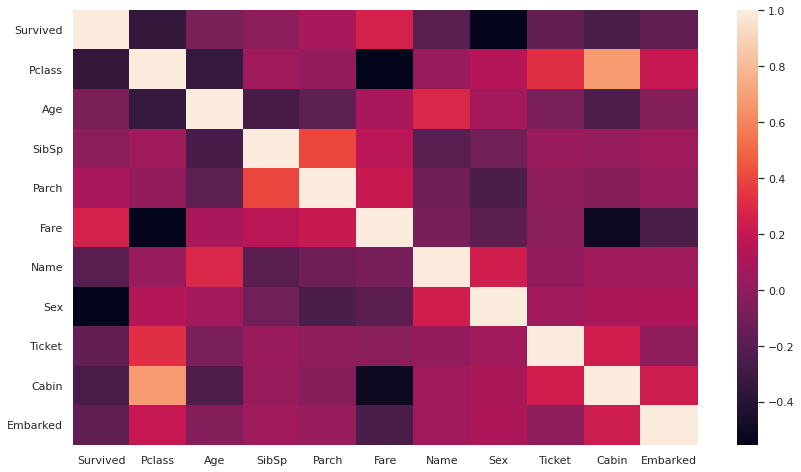

In [87]:
#Visualizing the correlation between the features:
sns.set(rc={'figure.figsize':(14,8)})
sns.heatmap(df.corr())

## Comments
Most Correlated Features with Output (Survived) are Pclass and Sex

## ----------------------------------------------------------------------------------------------------------------------------------------------------------------

## Machine Learning 

### Logistic Regression

In [88]:
# split into training and testing sets
x=df.drop(['Survived'],axis = 1)
y=df['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [89]:
# Logistic Regression
Logmodel = LogisticRegression(max_iter=1000)
Logmodel.fit(x_train,y_train)

y_pred = Logmodel.predict(x_test)

In [90]:
# Classification Report
class_report = classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       101
           1       0.80      0.75      0.77        75

    accuracy                           0.81       176
   macro avg       0.81      0.80      0.81       176
weighted avg       0.81      0.81      0.81       176



In [91]:
# Trying Changing Threshold
decisions = (Logmodel.predict_proba(x_test) >= 0.3).astype(int)[:,1]

class_report = classification_report(y_test,decisions)
print(class_report)

              precision    recall  f1-score   support

           0       0.90      0.74      0.82       101
           1       0.72      0.89      0.80        75

    accuracy                           0.81       176
   macro avg       0.81      0.82      0.81       176
weighted avg       0.83      0.81      0.81       176



[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

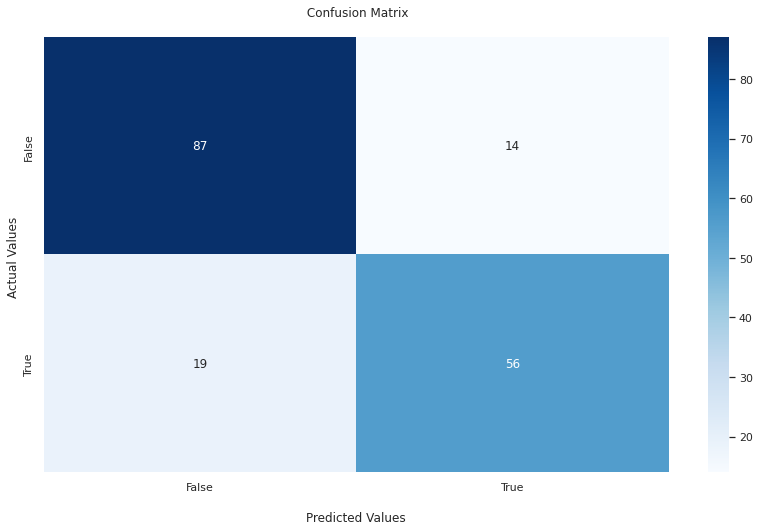

In [92]:
# Displaying Confusion Matrix
cf_matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

In [93]:
# Evaluation Metrics
accuracy = metrics.accuracy_score(y_test,y_pred)
f1_score = metrics.f1_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)

print(f"model Accuracy = {100*accuracy:.3} %")
print(f"model f1_score = {100*f1_score:.3} %")
print(f"model precision = {100*precision:.3} %")
print(f"model recall = {100*recall:.3} %")

model Accuracy = 81.2 %
model f1_score = 77.2 %
model precision = 80.0 %
model recall = 74.7 %


Text(0, 0.5, 'True Positive Rate')

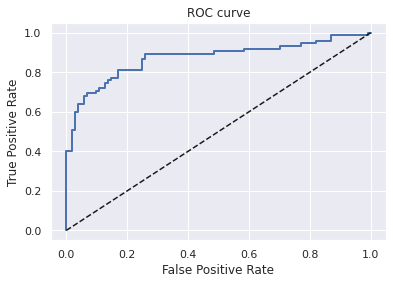

In [94]:
# Displaying ROC Curve

y_pred_proba = Logmodel.predict_proba(x_test)[::,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [95]:
# ROC Evaluation
ROC_AUC = metrics.roc_auc_score(y_test,y_pred_proba)

print(f'Model ROC_AUC = {100*ROC_AUC:0.3} %' )

Model ROC_AUC = 87.2 %


### KNN Algorithm

In [96]:
# KNN Algorithm 
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [97]:
y_pred = knn.predict(x_test)

In [98]:
class_report = metrics.classification_report(y_test,y_pred)

print(class_report)

              precision    recall  f1-score   support

           0       0.64      0.83      0.72       101
           1       0.62      0.37      0.47        75

    accuracy                           0.64       176
   macro avg       0.63      0.60      0.60       176
weighted avg       0.63      0.64      0.61       176



In [99]:
# Evaluation Metrics
accuracy = metrics.accuracy_score(y_test,y_pred)
f1_score = metrics.f1_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)

print(f"model Accuracy = {100*accuracy:.3} %")
print(f"model f1_score = {100*f1_score:.3} %")
print(f"model precision = {100*precision:.3} %")
print(f"model recall = {100*recall:.3} %")

model Accuracy = 63.6 %
model f1_score = 46.7 %
model precision = 62.2 %
model recall = 37.3 %


Text(0, 0.5, 'Error Rate')

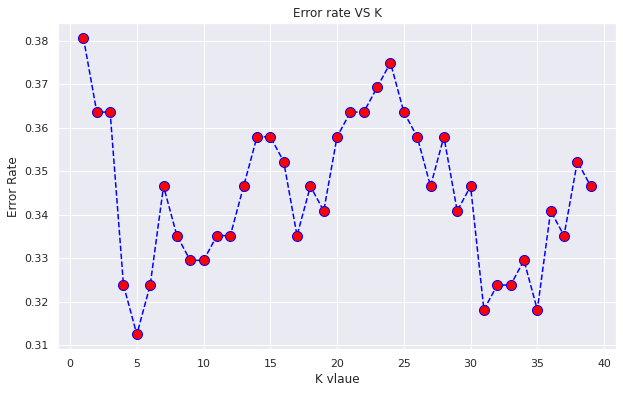

In [100]:
error_rate = []

for i in range(1,40):

  Knn_tuning = KNeighborsClassifier(n_neighbors=i)

  Knn_tuning.fit(x_train,y_train)

  predict_i= Knn_tuning.predict(x_test)

  error_rate.append(np.mean(predict_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title("Error rate VS K")

plt.xlabel('K vlaue')
plt.ylabel('Error Rate')

# plt.ylim(0.23,0.25)
# plt.xlim(10,15)

In [101]:
# Choosing Best K by hyper tuning
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)

class_report = metrics.classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.69      0.81      0.75       101
           1       0.67      0.52      0.59        75

    accuracy                           0.69       176
   macro avg       0.68      0.67      0.67       176
weighted avg       0.69      0.69      0.68       176



[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

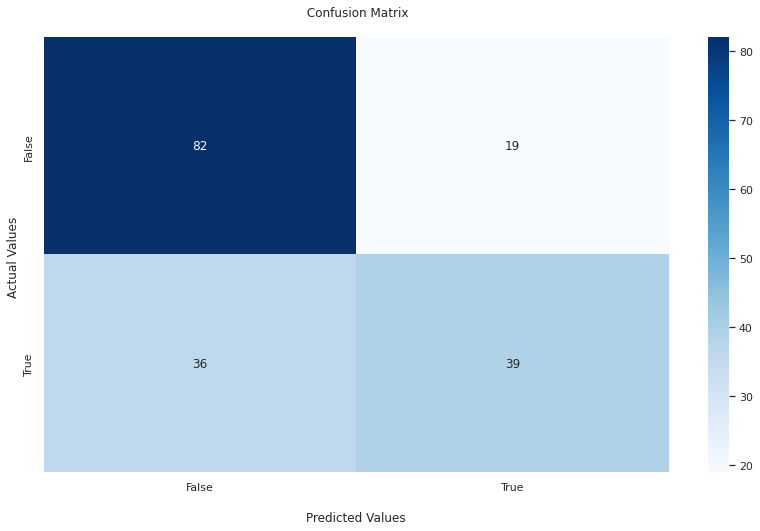

In [102]:
# Displaying Confusion Matrix
cf_matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

In [103]:
# Evaluation Metrics
accuracy = metrics.accuracy_score(y_test,y_pred)
f1_score = metrics.f1_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)

print(f"model Accuracy = {100*accuracy:.3} %")
print(f"model f1_score = {100*f1_score:.3} %")
print(f"model precision = {100*precision:.3} %")
print(f"model recall = {100*recall:.3} %")

model Accuracy = 68.8 %
model f1_score = 58.6 %
model precision = 67.2 %
model recall = 52.0 %


Text(0, 0.5, 'True Positive Rate')

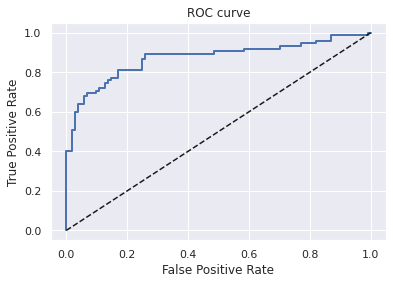

In [104]:
# Displaying ROC Curve

y_pred_proba = Logmodel.predict_proba(x_test)[::,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [105]:
# ROC Evaluation
ROC_AUC = metrics.roc_auc_score(y_test,y_pred_proba)

print(f'Model ROC_AUC = {100*ROC_AUC:0.3} %' )

Model ROC_AUC = 87.2 %


### SVM Algorithm 

In [106]:
svm_model = svm.SVC(probability=True)
svm_model.fit(x_train,y_train)

y_pred = svm_model.predict(x_test)


class_report = metrics.classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.64      0.87      0.74       101
           1       0.67      0.35      0.46        75

    accuracy                           0.65       176
   macro avg       0.65      0.61      0.60       176
weighted avg       0.65      0.65      0.62       176



[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

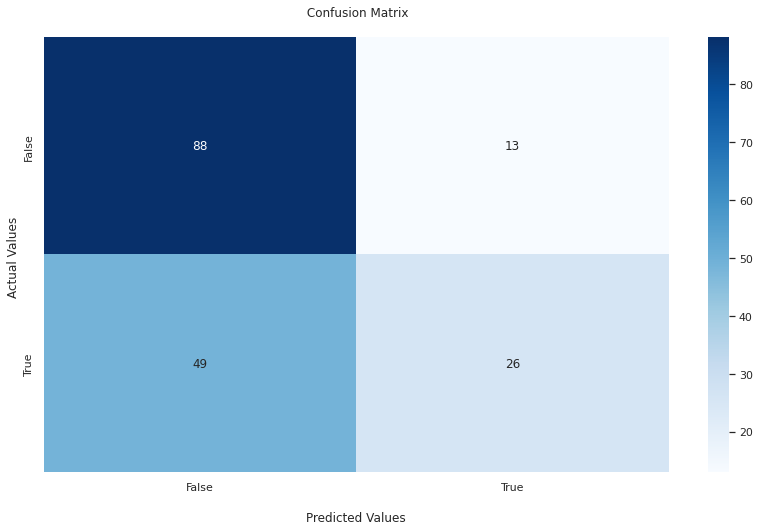

In [107]:
cf_matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

In [108]:
accuracy  = metrics.accuracy_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
f1_score = metrics.f1_score(y_test,y_pred)

print(f'Model Accuracy = {100*accuracy:0.3} %' )
print(f'Model recall = {100*recall:0.3} %' )
print(f'Model precision = {100*precision:0.3} %' )
print(f'Model f1_score = {100*f1_score:0.3} %' )

Model Accuracy = 64.8 %
Model recall = 34.7 %
Model precision = 66.7 %
Model f1_score = 45.6 %


Text(0, 0.5, 'True Positive Rate')

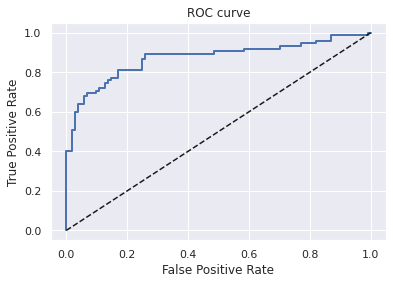

In [109]:
y_pred_proba = Logmodel.predict_proba(x_test)[::,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [110]:
# ROC Evaluation
ROC_AUC = metrics.roc_auc_score(y_test,y_pred_proba)

print(f'Model ROC_AUC = {100*ROC_AUC:0.3} %' )

Model ROC_AUC = 87.2 %


## Conclusion
*The best results were obtained using logistic regression.

*Best Obtained Model Score:

model Accuracy = 81.2 %

model f1_score = 77.2 %

model precision = 80.0 %

model recall = 74.7 %

Model ROC_AUC = 87.2 %

## ----------------------------------------------------------------------------------------------------------------------------------------------------------------